<a href="https://colab.research.google.com/github/AIgbine/NLP-Disaster-Classifier/blob/main/Disaster_Classification_data_cleaning_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries and Get the Data

In this case, the dataset is from Kaggle: which I have downloaded on my system.
The book: Natural Language Processing Recipes by Akshay Kulkarni was really helpful in the project

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

plt.style.use(style='seaborn')
%matplotlib inline

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [ ]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Data Cleaning

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
train.fillna(-99, inplace=True)

In [ ]:
train.head()

,id,keyword,location,text,target
0,1,-99,-99,Our Deeds are the Reason of this #earthquake M...,1
1,4,-99,-99,Forest fire near La Ronge Sask. Canada,1
2,5,-99,-99,All residents asked to 'shelter in place' are ...,1
3,6,-99,-99,"13,000 people receive #wildfires evacuation or...",1
4,7,-99,-99,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train.keyword.value_counts()

-99                      61
fatalities               45
armageddon               42
deluge                   42
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 222, dtype: int64

In [ ]:
train.location.value_counts()

-99                            2533
USA                             104
New York                         71
United States                    50
London                           45
                               ... 
The Windy City                    1
North East / Middlesbrough        1
Regalo Island                     1
Lincoln                           1
oman muscat al seeb               1
Name: location, Length: 3342, dtype: int64

In [ ]:
disaster = train[train['target'] == 1]
non_disaster = train[train['target'] == 0]

In [ ]:
disaster.shape[0]

3271

In [ ]:
non_disaster.shape[0]

4342

<BarContainer object of 2 artists>

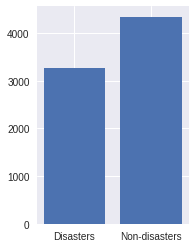

In [ ]:
plt.figure()
figsize=(16,8)
plt.subplot(1,2,1)
plt.bar(['Disasters','Non-disasters'], [disaster.shape[0],non_disaster.shape[0]])

In [ ]:
#Document-Term Matrix
#Remove number
#Lowercase letter
#Remove punctuation
#Remove Links
#Remove emoticons that may exist

In [ ]:
train['text'] = train['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
train['text']

0       our deeds are the reason of this #earthquake m...
1                  forest fire near la ronge sask. canada
2       all residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       just got sent this photo from ruby #alaska as ...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @thetawniest the out of control w...
7610    m1.94 [01:04 utc]?5km s of volcano hawaii. htt...
7611    police investigating after an e-bike collided ...
7612    the latest: more homes razed by northern calif...
Name: text, Length: 7613, dtype: object

In [ ]:
#Remove punctuation
import re
train['text'] = train['text'].str.replace('[^\w\s]',"")
#String can also be used
#import string
#for i in string.punctuation:
#    train['text'].replace(i,"")

In [ ]:
train['text']

0       our deeds are the reason of this earthquake ma...
1                   forest fire near la ronge sask canada
2       all residents asked to shelter in place are be...
3       13000 people receive wildfires evacuation orde...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    aria_ahrary thetawniest the out of control wil...
7610    m194 0104 utc5km s of volcano hawaii httptcozd...
7611    police investigating after an ebike collided w...
7612    the latest more homes razed by northern califo...
Name: text, Length: 7613, dtype: object

In [ ]:
#Remove stop words using nltk stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = stopwords.words('english')
train['text'] = train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
train['text']

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       13000 people receive wildfires evacuation orde...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    aria_ahrary thetawniest control wild fires cal...
7610    m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

In [ ]:
#Remove words with numbers
train['text'] = train['text'].str.replace('\w*\d\w*',"")

In [ ]:
train['text']

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3        people receive wildfires evacuation orders ca...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    aria_ahrary thetawniest control wild fires cal...
7610                                      volcano hawaii 
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

In [ ]:
#We can also run spellcheck for the text data to check for errors
#or a custom lookup dictionary
#However we won't be doint this yet
#Also did not remove links (slipped my mind) so that is something to try out

In [ ]:
#Tokenizing Text
#Using nltk
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

train["tokens"] = train["text"].map(tokenizer.tokenize)

In [ ]:
train[['text', 'tokens']]

,text,tokens
0,deeds reason earthquake may allah forgive us,"[deeds, reason, earthquake, may, allah, forgiv..."
1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,residents asked shelter place notified officer...,"[residents, asked, shelter, place, notified, o..."
3,people receive wildfires evacuation orders ca...,"[people, receive, wildfires, evacuation, order..."
4,got sent photo ruby alaska smoke wildfires pou...,"[got, sent, photo, ruby, alaska, smoke, wildfi..."
...,...,...
7608,two giant cranes holding bridge collapse nearb...,"[two, giant, cranes, holding, bridge, collapse..."
7609,aria_ahrary thetawniest control wild fires cal...,"[aria_ahrary, thetawniest, control, wild, fire..."
7610,volcano hawaii,"[volcano, hawaii]"
7611,police investigating ebike collided car little...,"[police, investigating, ebike, collided, car, ..."


### EDA

For EDA, I saw a tutorial on youtube and I liked. He was able to generate new features to answer and plot questions such as:
* Number of words
* Number of characters etc

I decided to do it the way he did his. 
The difference however is that he performed EDA before Data Cleaning. 
I am carrying out EDA after some measure of Data Cleaning.
You can check his video to see the impact of my Data Cleaning on EDA
https://www.youtube.com/watch?v=7kxjN_MHqyw&list=PL7qHbYUK0G0oKwpedmafwocmnZmheyxgI&index=1

In [ ]:
def target_features(feature):
    x1 = train[train.target == 1][feature]
    x2 = train[train.target == 0][feature]
    plt.figure(1, figsize=(16,8))
    plt.subplot(1,1,1)
    _ = plt.hist(x2, alpha=0.5,color='grey',bins=50)
    _ = plt.hist(x1, alpha=0.7,color='red',bins=50 )
    
    return _

In [ ]:
#Word count
train['words_count'] = train.text.str.split().map(lambda x: len(x))

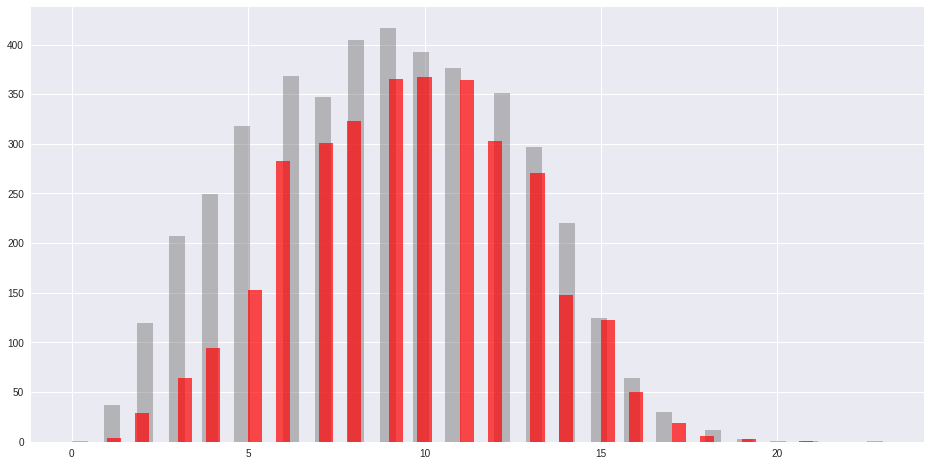

In [ ]:
#Plot of number of words
_ = target_features('words_count')

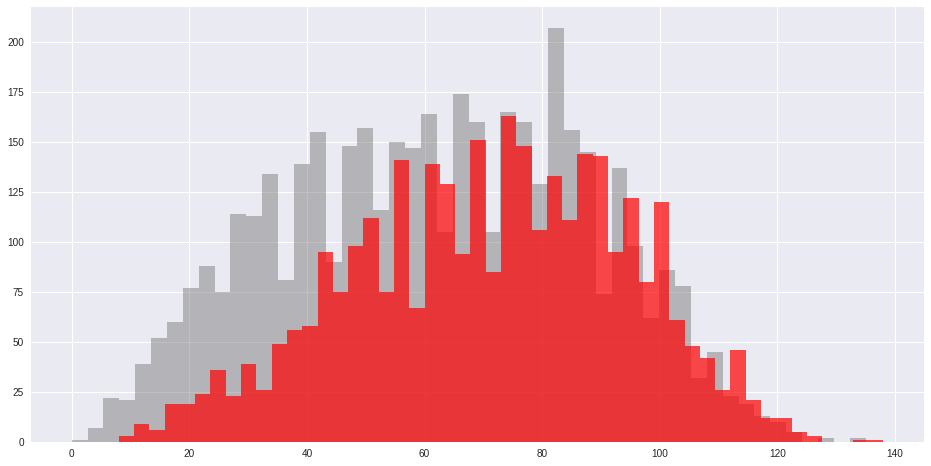

In [ ]:
train['text_len'] = train.text.map(lambda x: len(x))
#Plot of number of characters
_ = target_features('text_len')

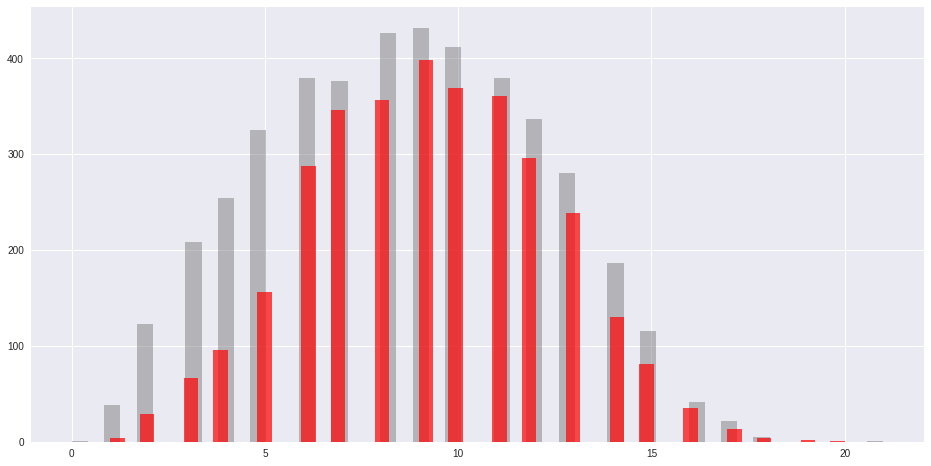

In [ ]:
#Number of unique words count
train['unique_word_count'] = train.text.map(lambda x: len(set(str(x).split())))
_ = target_features('unique_word_count')

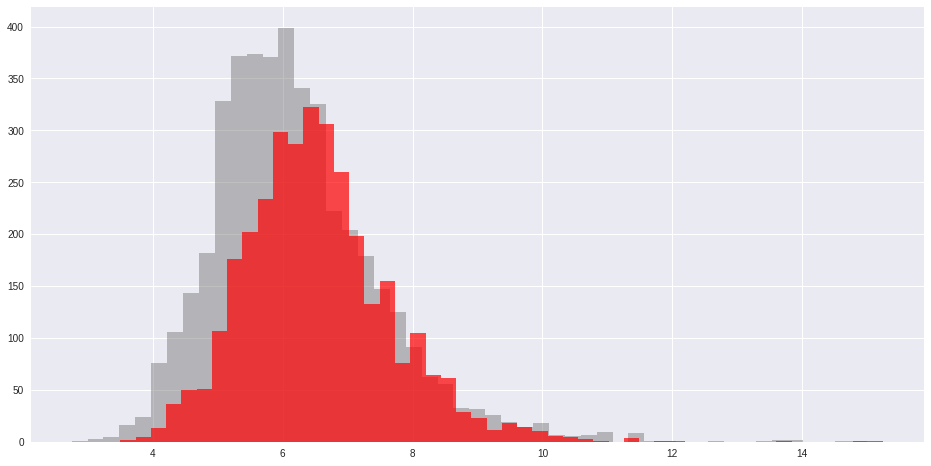

In [ ]:
#Mean word length
#Don't want to see any warnings
train['mean_word_length'] = train.text.map(
    lambda x: np.mean([len(w) for w in str(x).split()]))
_ = target_features('mean_word_length')

I have intentionally skipped Stemming and Lemmatization. This is to later compare the effects of these steps on text analysis.

In [ ]:
from collections import defaultdict 
  
  
# Defining a dict 
d = dict() 
  
for i in train['text']:
    word = i.split()
    for w in word:
        d[w] = d.get(w,0) +1

In [ ]:
for k,v in d.items():
    print(k,v)
    
#I notice some underscores have made it past my punctuation clean

Streaming output truncated to the last 5000 lines.
thehammers_ 1
alsowhat 1
injuredthen 1
bilic 1
slated 1
themhe 1
httptcocekbxjmpbj 1
mcilroy 3
pga 1
speculation 1
rory 2
fueled 1
speculatio 1
httptcodcyyjvmxhr 1
httptcoeqccrtlnbd 1
wearethenews 1
forgiven 3
forgotten 4
aesop 1
kinesiology 1
ironmanå 1
longlasting 1
durability 1
effectiveness 1
httptcoejymkzpeex 1
tayiorrmade 1
megatronafc 1
possibly 3
ankles 1
regardless 2
creeping 1
inflicted 1
derma 1
brackets 1
slating 1
jackwilsheres 1
disgrace 1
upah 1
cramp 1
wreak 1
seatbelt 1
jamienye 1
coaching 1
defence 1
cursed 1
riders 2
attended 1
romford 1
peel 1
male 1
southdown 1
windsor 1
likeavillasboas 1
rich_chandler 1
nalathekoala 1
professional 2
sequalae 1
suicides 1
homicides 1
nyack 1
pineview 1
railroad 1
crossing 1
fkhanage 1
shad 1
forsythe 1
inevitably 2
adhd 1
longterm 2
problems 7
imsushickoflove 1
alekalicante 1
gauze 1
buffoonmike 1
bite 2
influenced 1
forsure 2
disabledveterans 1
groin 1
thepartyofmeanness 1
httpstc

In [ ]:
#Sorted Frequency of words
sorted(d.items(), key=lambda x: x[1], reverse=True)

[('like', 345),
 ('im', 299),
 ('amp', 298),
 ('fire', 250),
 ('get', 229),
 ('new', 224),
 ('via', 220),
 ('people', 196),
 ('news', 193),
 ('one', 192),
 ('dont', 191),
 ('video', 165),
 ('us', 164),
 ('emergency', 157),
 ('disaster', 152),
 ('police', 140),
 ('would', 131),
 ('still', 129),
 ('body', 124),
 ('burning', 120),
 ('back', 119),
 ('crash', 118),
 ('california', 117),
 ('storm', 117),
 ('suicide', 116),
 ('got', 112),
 ('time', 112),
 ('know', 112),
 ('man', 110),
 ('buildings', 110),
 ('day', 108),
 ('rt', 107),
 ('first', 107),
 ('see', 105),
 ('going', 103),
 ('world', 103),
 ('bomb', 103),
 ('cant', 102),
 ('nuclear', 101),
 ('love', 100),
 ('fires', 100),
 ('attack', 99),
 ('youtube', 98),
 ('two', 97),
 ('dead', 96),
 ('killed', 96),
 ('go', 95),
 ('train', 93),
 ('full', 91),
 ('car', 90),
 ('war', 90),
 ('may', 88),
 ('families', 88),
 ('life', 87),
 ('accident', 87),
 ('today', 87),
 ('good', 87),
 ('hiroshima', 87),
 ('think', 86),
 ('say', 85),
 ('watch', 85),


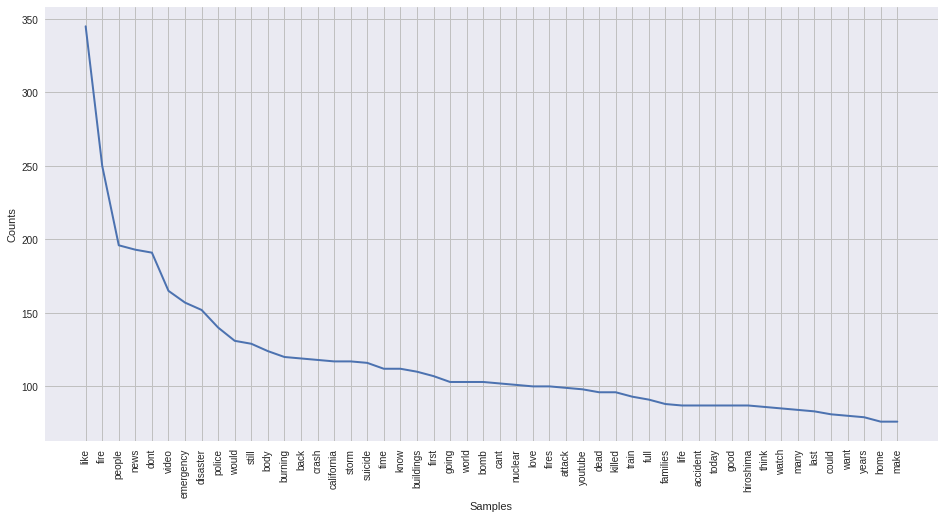

In [ ]:
#Plotting words with length more than 3
plt.figure(figsize=(16,8))
large_words = dict([(k,v) for k,v in d.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(50,cumulative=False)

In [ ]:
train['tokens']

0       [deeds, reason, earthquake, may, allah, forgiv...
1           [forest, fire, near, la, ronge, sask, canada]
2       [residents, asked, shelter, place, notified, o...
3       [people, receive, wildfires, evacuation, order...
4       [got, sent, photo, ruby, alaska, smoke, wildfi...
                              ...                        
7608    [two, giant, cranes, holding, bridge, collapse...
7609    [aria_ahrary, thetawniest, control, wild, fire...
7610                                    [volcano, hawaii]
7611    [police, investigating, ebike, collided, car, ...
7612    [latest, homes, razed, northern, california, w...
Name: tokens, Length: 7613, dtype: object

In [ ]:
from wordcloud import WordCloud

In [ ]:
def create_corpus(df, target):
    """
    Create corpus based on the target.
    """
    corpus = []

    for x in df[df["target"] == target].text.str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [ ]:
corpus0 = create_corpus(df=train, target=0)
corpus1 = create_corpus(df=train, target=1)

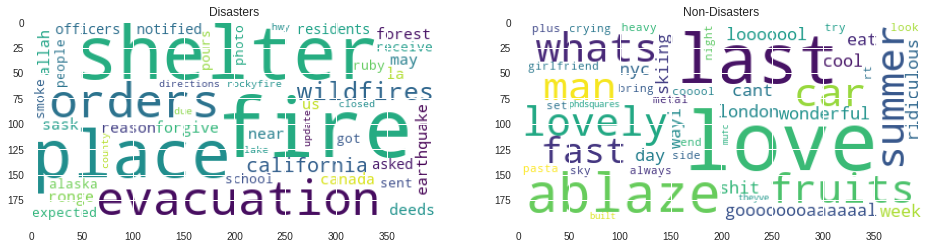

In [ ]:
word_cloud0 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpus0[:50])
)
word_cloud1 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpus1[:50])
)

plt.figure(1, figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Disasters')
plt.imshow(word_cloud1)
plt.subplot(1, 2, 2)
plt.title('Non-Disasters')
plt.imshow(word_cloud0)

##### Now Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()


def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]

    return " ".join(text)

In [ ]:
train["text"] = train["text"].map(stemming)
corpus0 = create_corpus(df=train, target=0)
corpus1 = create_corpus(df=train, target=1)

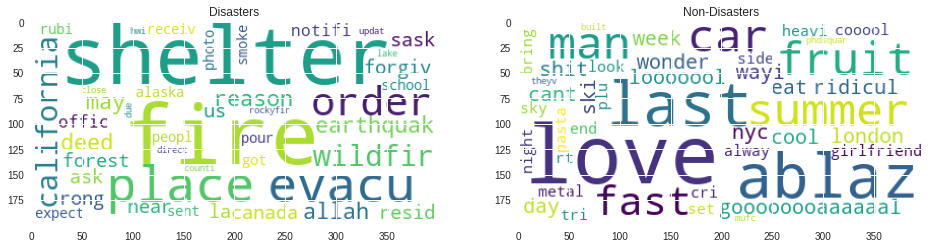

In [ ]:
word_cloud0 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpus0[:50])
)
word_cloud1 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpus1[:50])
)

plt.figure(1, figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Disasters')
plt.imshow(word_cloud1)
plt.subplot(1, 2, 2)
plt.title('Non-Disasters')
plt.imshow(word_cloud0)

##### Observations

* The wordcloud is similar when Stemming was carried out and when it was not
* We can see that for disasters, words like [shelter, evacuate,wildfire etc] are more popular. This is what we would actually expect in cases of disaster.
* For Non-disasters, the words seem more random. We have [cool, fast, car, summer, love etc]

In [ ]:
#Pickle data for further use
